# <span style='color:orange'>모델 학습 평가 (1)</span>

지도 학습의 평가 방법은 분류 문제인지 회귀 문제인지에 따라 필요한 지표가 다르다


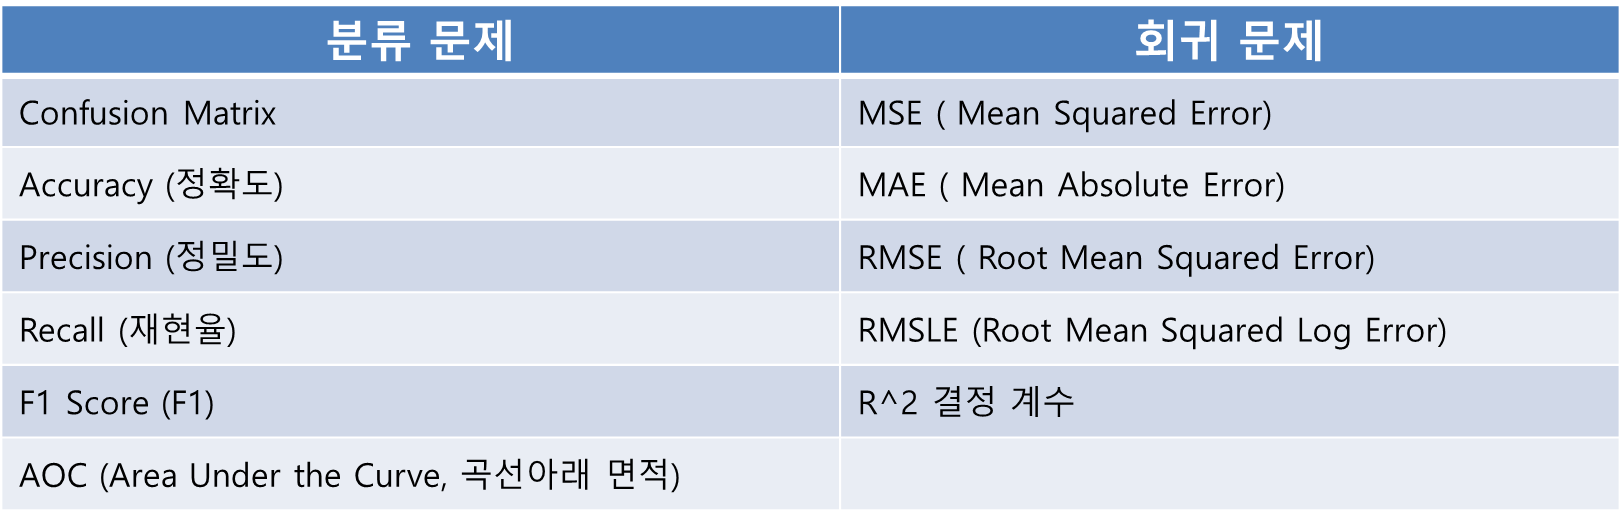
- 각각의 모델 평가 지표의 의미를 이해하고 해결하려는 문제에 적절한 것을 선택


머신러닝은 데이터가공/변환, 모델 학습/예측 그리고 평가의 프로세스로 구성된다.


<img src='https://t1.daumcdn.net/cfile/tistory/234C864558B6755F17' width='600' alt='Image from http://prac.im.pwr.edu.pl/~szwabin/assets/bdata/8.pdf'>

[그림링크](http://prac.im.pwr.edu.pl/~szwabin/assets/bdata/8.pdf)


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

plt.rc('font', family=fontname)  #  'NanumGothic'
# plt.rcParams["font.family"] = fontname

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

테스트한 버전: NumPy: 1.18.1 / SciPy: 1.4.1 / Matplotlib: 3.0.2 / Sklearn: 0.22.1

## 평가 개요

머신러닝 모델의 여러 가지 방법으로 예측 성능을 평가할 수 있는데 앞에서는 정확도를 이용했다. 모델이 분류 혹은 회귀냐에 따라서 여러 종류로 나뉜다.

 - 회귀: 실제 예측 값의 오차 평균에 기반
 - 분류: 예측 결과의 정확성 판단.

분류 평가시 정확도만 가지고 판단해 잘못된 결과에 빠질 수 있다. 여기서 분류에 사용되는 성능 평가 지표를 살펴보자.

### 회귀 문제 평가

회귀 평가지표로 목표값과 실제값의 차이의 오차를 이용하는 MSE, RMSE, RMSLE, MAE 등이 있다. 

### 분류 문제 평가

이항/이진 분류와 다항/다중 분류로 구분할 수 있는데 분류 모델의 평가는 이진분류의 모델을 기반으로 설명된다.
 - 오차행렬
 - 정확도
 - 정밀도
 - 재현율
 - F1 score
 - AOC

<br>

## 정확도의 왜곡

보통 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지 판단

$$
Accuracy = \frac{예측\ 결과가\ 동일한\ 데이터\ 건수}{전체\ 예측\ 데이터\ 건수}
$$

직관적으로 모델 예측 성능을 나타낼 수 있는 지표이다.

이진분류는 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있다. 때문에 정확도 수치 하나만 가지고 ML성능을 평가하지 않는다. 

### ex) 왜곡 사례 - MNIST 데이터 세트

MNIST 데이터 세트로 불균형 데이터를 만들고 정확도 지표 적용시 어떤 문제가 발생하는지 확인해 보자,


In [ ]:
from sklearn.datasets import load_digits

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [ ]:
y.shape, y[:10]

In [ ]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

MyFakeClassifier 는 불균형 세트의 모든 데이터를 False 즉 0으로 예측하는 Classifier 를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타낸다. 

In [ ]:
"""
MyFakeClassifier
"""
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):

    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X),1) , dtype=bool)


In [ ]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

# <span style='color:orange'>1. 회귀학습 평가 지표

일반적으로 회귀의 성능을 평가하는 지표는 다음 같다:
- MSE, RMSE : 오차의 평균을 이용
- MSLE(Mean Squared Log Error) 와 RMSLE( Root Mean Squared Log Error) : MSE, RMSE에 로그를 적용
- MAE : 오차의 절대값

<img src='https://i.imgur.com/vvkqe4W.png'>

이밖에도 MSE, RMSE에 로그를 적용한 MSLE(Mean Squared Log Error) 와 RMSLE( Root Mean Squared Log Error) 도 사용한다. 사이킷런은 RMSLE 를 제공하지 낳는다. MSE에 제곱근을 씌워 계산해야 한다. 


###  평가 지표 정리

- 0에 가까울 수록 좋은 성능: MSE, MAE, RMSE, RMSLE
- 1에 가까울 수록 좋은 성능: R-Squared
 

## Scikit-learn 평가 메서드

다음은 각 평가 방법에 대한 사이킷런의 API 및 `cross_val_score()`, `GridSearchCV` 에서 평가시 사용하는 `scoring=` 파라미터의 적용값이다.

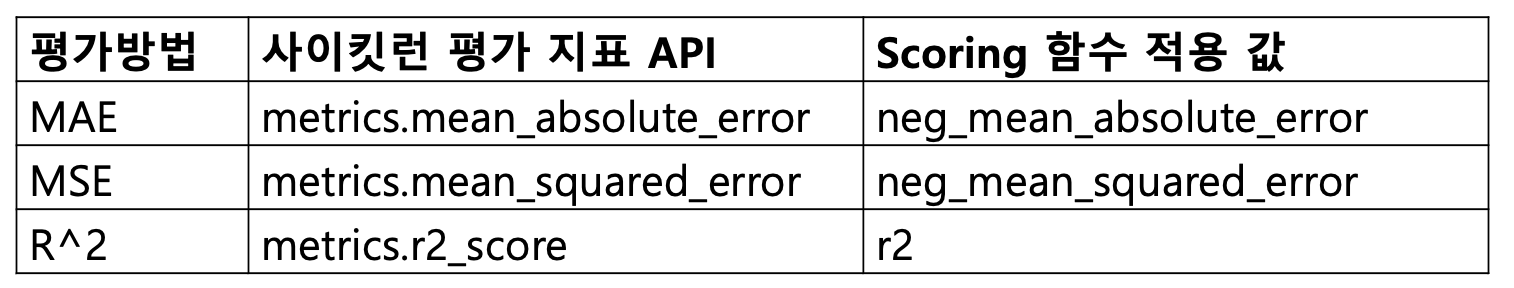

## ex) 보스턴 주택가격 회귀분석 평가

LinearRgression으로 보스턴 주택 가격의 회귀 모델을 만들고 평가지표를 검토해 보자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# scikit 1.2 부터 load_boaston() 지원이 중단된다.
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 

In [ ]:
# boston 데이타셋 DataFrame 변환 
boston_df = pd.DataFrame(data, # 학습 데이터
                        columns=feature_names)
boston_df['TARGET'] = target
boston_df

데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질수 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 주택 가격

산점도와 회귀직선을 보면 RM, LSTAT 의 PRICE 영향도가 가장 두드러 지는 것으로 보인다.
 - RM 방크기: 방의 크기가 클수록 가격이 증가하는 **양방향의 선형성(Positive linearity)**를 보인다.
 - LSTAT 하위계측 비율: LSTAT이 적을수록 PRICE가 증가하는 **음 방향의 선형성**을 보인다.

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='TARGET' ,data=boston_df , ax=axs[row][col])

산포도 특성을 보아 RM 이 가격에 영향이 있으므로 RM을 먼저 학습해 본다.

### RM 특성 학습

RM 특성 학습 데이터 분리

In [ ]:
X_train = data[:, [5,]] # RM 특성만 가진 데이터셋 추출
y = target

In [ ]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성
model = LinearRegression()
model.fit(X_train, y) # 학습
y_pred = model.predict(X_train)

선형 데이터는 열 벡터이므로 방정식 $y = ax + b$ 이고 회귀식으로 통해 기울기와 절편을 구해야 한다.

In [ ]:
# 기울기와 절편의 확인
print(f'기울기: {model.coef_}')
print(f'절편: {model.intercept_}')

산출된 기울기 절편을 통해 회귀식을 완성한다.

$$
y = 9.1 x - 34.67
$$

#### MSE / RMSE

평균제곱오차를 통해 오차가 작은지를 통해 평가할 수 있다. scikit learn 의 mean_squared_error 함수로 계산

In [ ]:
#mean_squared_error
# 종속 변수와 예측 모델로 평균 제곱 오차 계산

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

#### 결정계수 $R^2$

평균 제곱 오차를 사용해 학습한 모델 예측의 적합도를 나타내는 지수
 - 𝑅2라는 기호로 표기
 - 결정 계수가 최댓값인 1.0 이면 오차가 없다는 의미
 - 보통은 0.0 과 1.0 사이의 값으로 나타내지만 , 예측 값과 실제 데이터 사이의 오차가 너무 크면 음숫값으로 나타나기도 한다

In [ ]:
from sklearn.metrics import r2_score

# 종속 변수와 예측 모델로 결정계수로 계산
print(f'결정계수: {r2_score(y, y_pred)}')

### 다중 특성 예측과 평가

RM 을 포함한 여러 특성을 학습해 보자.

In [ ]:
train = boston_df.drop(['TARGET'],axis=1)
target = boston_df['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( 
    train , target ,test_size=0.3, random_state=156)
X_train.shape, y_train.shape

In [ ]:
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)

주택가격 모델의 절편(intercept)과 회귀계수(coerricient)를 보자.

In [ ]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

회귀계수 coef_ 에 피처 값을 매핑하고 큰 값 순서로 출력해 보면 - RM 이 양의 값으로 가장 크고, NOX 가 음 값이 너무 커 보인다.

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=feature_names )
coeff.sort_values(ascending=False)

In [ ]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('결정계수(Variance score): {0:.3f}'.format(r2_score(y_test, y_preds)))

### 최적화를 수행 cross_val_score()

cross_val_score() 를 이용해 교차 검증으로 MSE, RMSE를 측정해 보겠다. 
 - `scoring="neg_mean_squared_error"` 를 주면 계산된 MSE 값에 -1을 곱해서 반환하므로 -1을 다시 곱했다.
 - RMSE 를 위해 제곱근 계산과 그 평균을 추가한다.

In [ ]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, train, target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5개 폴더 세트에 대한 교차검증 결과로 평균 RMSE=5.829 가 나왔다.



---

<br>

# <span style='color:orange'>2. 이진분류 평가지표 (1)</span>

 - 오차행렬
 - 정확도
 - 정밀도
 - 재현율
 - F1 score
 - AOC

평가 지표 확인을 위한 간단한 학습 진행 유방암 데이터셋

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 유방암 데이터셋 불러오기
cancer = load_breast_cancer()

# 특징 데이터 생성
X = cancer.data
# 종속 변수 생성 악성 발견이 목적이므로 레이블의 0 과 1 을 바꿈
y = 1 - cancer.target
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42)

In [ ]:
X.shape, y.shape

In [ ]:
X_train.shape, y_train.shape

In [ ]:
# 로지스틱 회귀 모델 생성
model = LogisticRegression(solver="liblinear")
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

print("LOGREG 훈련 세트 점수: {:.2f}".format(model.score(X_train, y_train)))
print("LOGREG 테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))

ㅇ

In [ ]:
# titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')   # 정리된 자료
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv') # 원본
titanic_df.head()

## 오차행렬

이진분류에서 성능 지표로 잘 활용되는 오차행렬(confusion matrix, 혼동행렬)은 Error matrix 라고도 표현되는데. 학습된 분류 모델을 예측 수행하면서 얼마나 헷갈리고(confused) 있는지 보여주는 지표이다. 



**[오차행렬 그래프]**


오차행렬은 아래 같이 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떤 유형을 갖는지 매핑되는지 나타낸다.

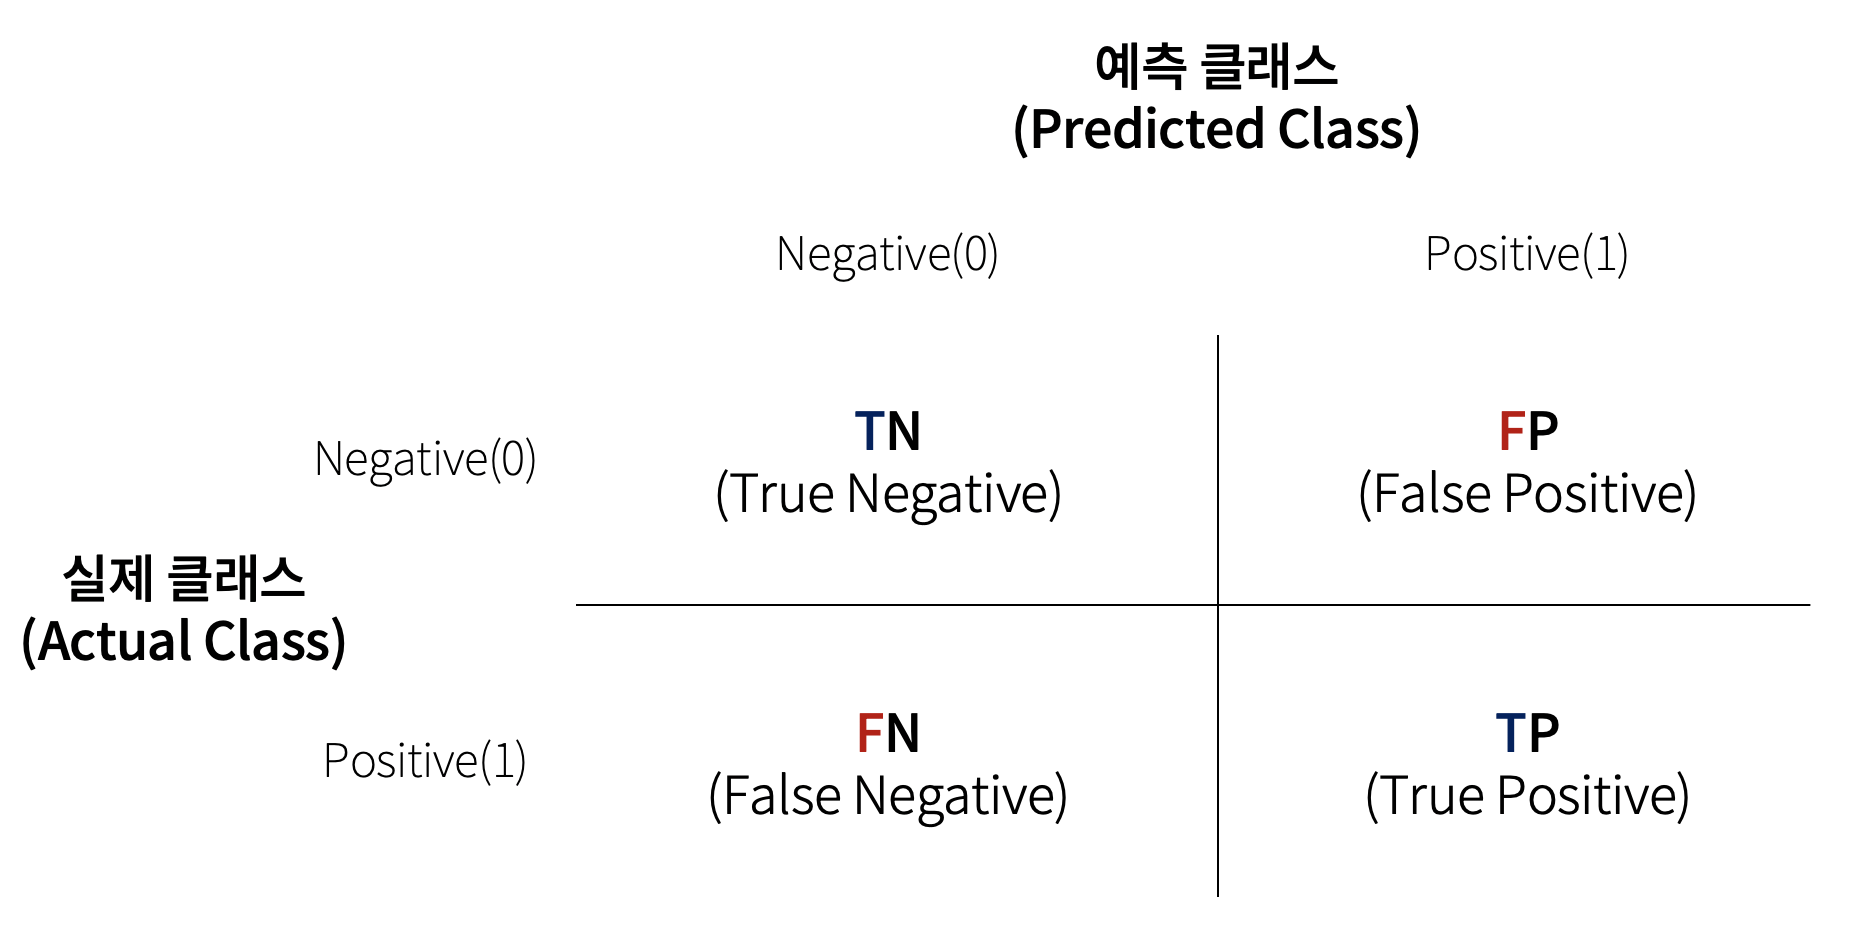

- 4분면에서 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative, Positive로 분류
- 4분면 위,아래를 실제 클래스 값 기준으로 Negative, Positive로 분류
- 예측 클래스와 실제 클래스 값 유형에 따라 TN, FP, FN, TP 형태로 오차행렬을 채운다.
- TN, FP, FN, TP 이란 실제/예측 값 순서이다.

TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능 오류가 어떤 모습으로 발생하는지 알 수 있다.

- True Positives : 1인 레이블을 1이라 하는 경우.
    - 관심 범주를 정확하게 분류한 값.
- False Negatives : 1인 레이블을 0이라 하는 경우.
    - 관심 범주가 아닌것으로 잘못 분류함.
- False Positives : 0인 레이블을 1이라 하는 경우.
    - 관심 범주라고 잘못 분류함.
- True Negatives : 0인 레이블을 0이라 하는 경우.
    - 관심 범주가 아닌것을 정확하게 분류.



### sklearn.confusion_matrix() API

사이킷런에서 sklearn.metrics.confusion_matrix() 로 결과를 2x2 배열에 각 TN, FP, FN, TP 분면에 속한 건수를 숫자를 반환한다.

In [ ]:
# Confusion Matrix 확인
from sklearn.metrics import confusion_matrix

# 종속 변수와 예측 결과로 Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred)
print(cm)

## 정확도 (Accuracy)

정확도는 1을 1로, 0을 0으로 정확하게 분류해낸 것을 의미한다. 모델이 얼마나 정확한지를 평가하는 척도라고 할 수 있다. 정확도는 예측값과 실제 값이 얼마나 동일한가 비율로 결정된다. 
  - 오차행렬에서 True에 해당하는 TN, TP에 좌우된다. 
  
정확도는 오차행렬에서 아래 같이 정의 된다.

$$
Accuracy = \frac{TN+TP}{TN+FP+FN+TP}
$$




In [ ]:
from sklearn.metrics import accuracy_score

# 종속변수의 예측 결과로 정확도 예측
print(accuracy_score(y_test, y_pred))

## 정밀도 (Precision)

두번째 척도로, 정밀도(Precision)가 있다. 모델을 통해 1이라고 분류해낸 그룹 A가 있을 때, 모델이 얼마나 믿을만한 정도로 A를 만들어 냈는지를 평가하는 것이다. 어부가 그물을 던져 물고기를 잡을 때, 그물 안에 1이라는 물고기가 얼마나 들어있는가에 대한 척도이다.

$$
Precision = \frac{TP}{FP+TP}
$$

**_예측을 Positive로 한 것 중에서 실제 Positive 로 일치한 데이터의 비율_** 이다. 분모 FP+TP는 예측을 Positive로 한 모든 데이터 건수이고, TP는 실제 값이 Positive로 일치한 건수이다. 정밀도는 양성 예측도라고도 불린다.

In [ ]:
from sklearn.metrics import precision_score

# 종속변수의 예측 결과로 정확도 예측
print(precision_score(y_test, y_pred))

## 재현율 (Recall)


세번째 척도로, 재현률(Recall)가 있다. 정밀도와 비교되는 척도로써, 전체 예측 중에 TP가 얼마나 많은 가에 관한 것이다. 관심 영역만을 얼마나 추출 해냈는지를 말한다. 즉, 모형의 실용성과 관련된 척도라고 할 수 있다.


실제 **_Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터 비율_** 이다. FN+TP는 실제 Positive인 모든 건수이고, 분자 TP는 실제 값이 Positive로 일치한 것이다. 재현율은 민감도(sensitivity), TPR(True Positive Rate)라고도 불린다.

$$
Recall = \frac{TP}{FN+TP}
$$

In [ ]:
from sklearn.metrics import recall_score

# 종속변수의 예측 결과로 정확도 예측
print(recall_score(y_test, y_pred))

## F1 스코어


F1 score는 정밀도와 재현율을 결합한 지표이다. 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가진다.

$$
F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}}\\
= 2\times \frac{precision * recall}{precision + recall}
$$

정밀도와 재현율의 조화평균이다. F1 스코어의 최대값이 1인 것을 알 수 있다.

모델A의 정밀도 0.9, 재현율이 0.1로 극단적 차이가 나고, 모델B의 정밀도 0.5, 재현율 0.5라면 
 - 모델A의 F1은 0.18, 모델B의 F1은 0.5
 


In [ ]:
from sklearn.metrics import f1_score 

# 종속변수의 예측 결과로 정확도 예측
f1 = f1_score(y_test , y_pred)
print(f1_score(y_test, y_pred))

## Scikit-learn Classification Report

sklear.metrics.classification_report 는 평가 정보를 제공할 수 있다.

In [ ]:
from sklearn.metrics import classification_report
print(f"DT classification report \n"
     f"{classification_report(y_test, y_pred)}")